In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

1.  Import the data from ’bakersyeastreferencebatches.xlsx’.  Identify how many batches are in the data.  What is the duration of each batch and how many data points are there per batch?  How many variables are measured (including time)?

**There are 16 batches in the data. The duration of each batch is 13.167 seconds. There are 83 data points per batch. We have a total of 8 variables including time namely: [Time,	Ethanol	,Temperature	,Molasses flow,	NH3 flow,	Air flow,	Level,	pH]**




In [44]:
df = pd.read_excel('/content/bakers_yeast_reference_batches.xlsx')

In [45]:
df.tail()

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
1323,2568,2569,Xa,13.0000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.1667,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.3333,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.5000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270
1327,2572,2573,Xa,13.6667,0.00647,32.8321,2.55432,0.01781,5739.12,57.2948,6.34062


In [46]:
#checking null values
df.isnull().sum()

Unnamed: 0       0
Primary ID       0
BatchID          0
Time             0
Ethanol          0
Temperature      0
Molasses flow    0
NH3 flow         0
Air flow         0
Level            0
pH               0
dtype: int64

In [47]:
#checking for data points
df['BatchID'].value_counts().unique()

array([83])

In [48]:
#checking for batches
df['BatchID'].unique()

array(['bb', 'cb', 'db', 'eb', 'fb', 'gb', 'hb', 'ib', 'jb', 'kb', 'lb',
       'Ma', 'Na', 'Ta', 'Va', 'Xa'], dtype=object)

In [49]:
#grouping by batchID to get the duration of each batch
dff = df['Time'].groupby(df['BatchID']).max()

In [50]:
dff

BatchID
Ma    13.6667
Na    13.6667
Ta    13.6667
Va    13.6667
Xa    13.6667
bb    13.6667
cb    13.6667
db    13.6667
eb    13.6667
fb    13.6667
gb    13.6667
hb    13.6667
ib    13.6667
jb    13.6667
kb    13.6667
lb    13.6667
Name: Time, dtype: float64

2.  Plot the variables time-profiles in a 2x4 subplot.  Inspect the graphs (don’t just plot them). Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled?

**Answer: As per the plot and their scale, the variables molasses flow, air flow and NH3 show highest variabilty while variables Ethanol and pH are tightly controlled.**

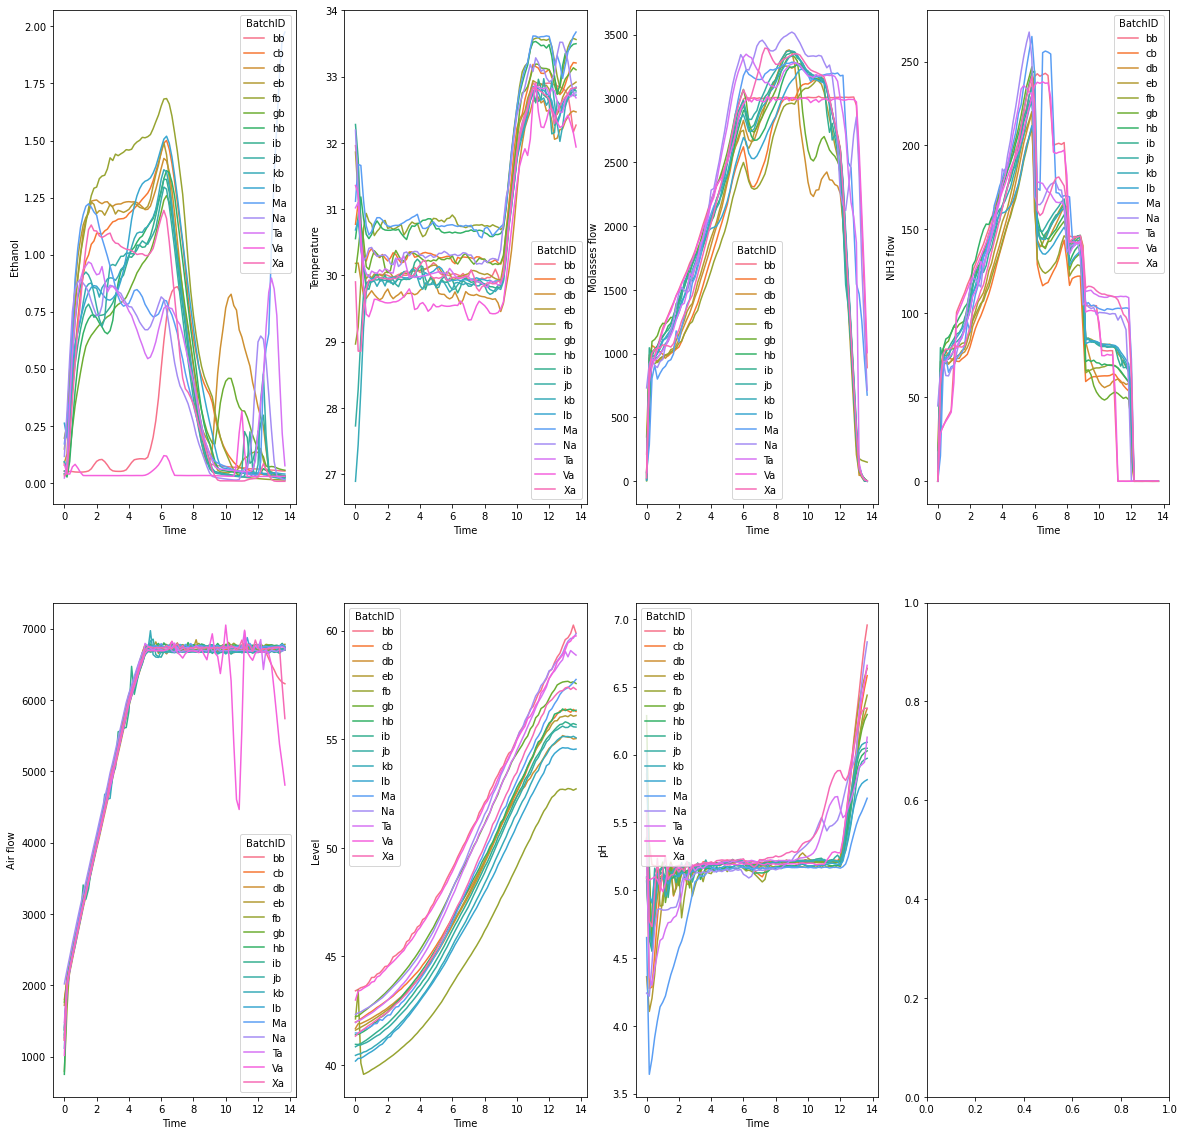

In [51]:
fig, axes = plt.subplots(2,4,figsize=(20,20))
sns.lineplot(x = 'Time', y = 'Ethanol',data = df,hue='BatchID',ax = axes[0,0])
sns.lineplot(x = 'Time', y = 'Temperature',data = df,hue='BatchID',ax = axes[0,1])
sns.lineplot(x = 'Time', y = 'Molasses flow',data = df,hue='BatchID',ax = axes[0,2])
sns.lineplot(x = 'Time', y = 'NH3 flow',data = df,hue='BatchID',ax = axes[0,3])
sns.lineplot(x = 'Time', y = 'Air flow',data = df,hue='BatchID',ax = axes[1,0])
sns.lineplot(x = 'Time', y = 'Level',data = df,hue='BatchID',ax = axes[1,1])
sns.lineplot(x = 'Time', y = 'pH',data = df,hue='BatchID',ax = axes[1,2])
#sns.lineplot(x = 'Time', y = 'BatchID',data = df,ax = axes[1,3])

3.  Select  the  features  (including  the  Time  column),  pre-process  the  data  and  performPCA with 5 principal components.  Extract the scores and loadings.

In [52]:
#dropping unwanted columns
df = df.drop(['Unnamed: 0','Primary ID'],axis=1)

In [53]:
df = df.set_index('BatchID')

In [54]:
#standardise dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.71130681, -1.04011805,  0.84597751, ..., -3.10825991,
        -0.96636672,  1.90190383],
       [-1.66956753, -1.042825  ,  0.50253889, ..., -2.61974424,
        -0.954013  ,  0.32731927],
       [-1.62782851, -1.04192268, -0.06621858, ..., -2.49309872,
        -0.93948474, -0.16307905],
       ...,
       [ 1.62781988, -1.13278386,  1.53606669, ...,  0.61527817,
         1.63473666,  3.32033889],
       [ 1.66956742, -1.13276288,  1.54361479, ...,  0.24514353,
         1.65241428,  3.40421753],
       [ 1.71131495, -1.13269993,  1.54787064, ..., -0.07730339,
         1.63473666,  3.3977962 ]])

In [55]:
#checking mean and sd of the data
df_scaled.mean(axis = 0)

array([-1.01658976e-16,  5.35047241e-17,  1.08614590e-15,  0.00000000e+00,
       -7.49066137e-17,  1.09015875e-16,  6.15304327e-16,  1.43258899e-15])

In [56]:
df_scaled.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
#performing pca with 5 components
pca = PCA(n_components=5, svd_solver='full')

In [58]:
pca_scores = pca.fit_transform(df_scaled)
pca_scores.shape

(1328, 5)

In [59]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = df.index)

In [60]:
scores_pd

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
bb,-0.808176,4.508288,-0.200368,1.295502,-0.754945
bb,-1.303347,3.391210,0.824346,0.666865,-0.552935
bb,-1.630004,3.073121,1.085677,0.706676,-0.168488
bb,-1.790453,2.816650,1.059588,0.979711,0.160562
bb,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
Xa,3.772295,2.368292,-1.644665,0.830572,-0.163892
Xa,3.875235,2.595895,-1.942104,0.980115,-0.265168
Xa,3.963794,2.665704,-2.074648,1.041445,-0.323446


In [61]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'] ,
                           index = df.columns)

In [62]:
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


4.  In  order  to  plot  the  scores-loading  plot,  you  need  to  pivot  the  scores  BatchID  withindex ’Time’ (use pandas pivottable).

In [63]:
#modification to get desired pivot table
scores_pd['Time'] = df['Time']

In [64]:
scores_pivot = scores_pd.pivot_table(index=['Time'],columns=['BatchID'])
scores_pivot

PC1                      ...       PC5                    
BatchID          Ma        Na        Ta  ...        jb        kb        lb
Time                                     ...                              
0.000000  -2.575226 -2.494768 -1.834810  ...  1.438659  1.833015 -0.111854
0.166667  -3.406333 -2.944182 -2.731785  ...  0.774914  1.236314 -0.332924
0.333333  -3.390333 -3.070940 -3.117042  ...  0.456887  0.850361 -0.270976
0.500000  -3.534499 -2.888284 -3.194946  ...  0.199308  0.471139 -0.038183
0.666667  -3.596972 -2.732277 -3.165646  ...  0.218693  0.224946  0.038438
...             ...       ...       ...  ...       ...       ...       ...
13.000000  2.489762  4.277071  3.184812  ... -0.126855 -0.147775 -0.175886
13.166700  2.481818  4.552587  3.157697  ... -0.242682 -0.292980 -0.289735
13.333300  2.421492  4.641010  3.372776  ... -0.286531 -0.326307 -0.334636
13.500000  2.397535  4.702980  3.579729  ... -0.338967 -0.322784 -0.355440
13.666700  2.442108  4.826890  3.850841  ... -0.322251 -0.327004 -0.367125

[83 rows x 80 columns]

5.  Plot  the  scores-loadings  plot  with  one  line  per  batch  (this  is  why  the  pivot  in  theprevious  step  was  needed).   The  output  should  look  similar  to  the  plot  below.   Youmay choose a different scaling, but the trend should be the same as this graph.

In [65]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    
    for i in df.index:
      xt = scores['PC1']
      yt = scores['PC2']
      n = loadings.shape[0]
      scalext = 1.0/(xt.max() - xt.min())
      scaleyt = 1.0/(yt.max() - yt.min())
      xt_scaled = xt * scalext
      yt_scaled = yt * scaleyt
      
      p = loadings
      p_scaled = MaxAbsScaler().fit_transform(p)
      
    
    for i in range(n):
      plt.plot(xt_scaled, yt_scaled)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'red',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'black', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

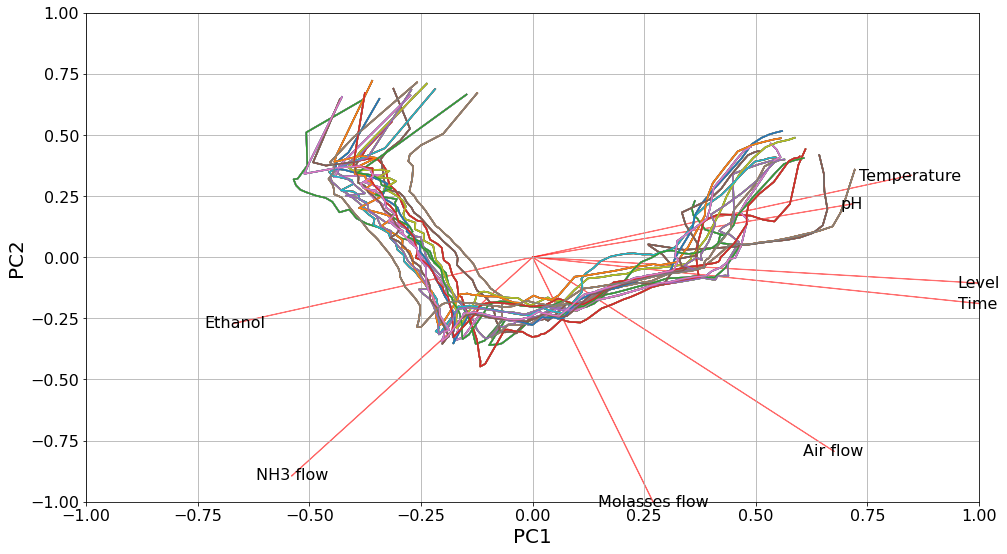

In [66]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(scores_pivot,loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

6.  Explain this graph.  In which quarter do the batches start and end?  What happens atthe kink where the direction of the lines changes?  Can you tell from this graph whichvariables do not change in the first phase and which in the second phase?

**Answer: The graph shows evolution of scores of each batch. The batches start at 4th Quadrant and end at 2nd quadrant.
For first phase, Ethanol, Temperature and pH do not change. while for the second phase, Molasses flow and Air flow  do not change**

7.  Plot the cumulative explained variance.  How much variance do the first two principalcomponents capture?

**The first two principal components capture around 78 percent of the variance.**

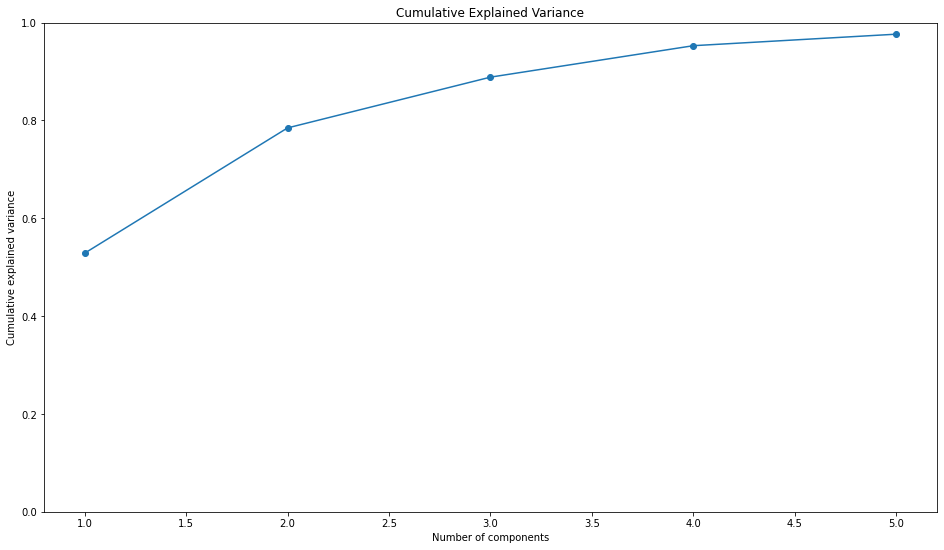

In [67]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.title ('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.ylim(0,1)
plt.show()

1.  Load the data from the file ’todaysbatches.xlsx’ and repeat the same procedure as in the steps 3-4 of the previous section with the exception of the PCA modeling.  Here,instead of fit the data to the model and transform, you will only transform them withthe model object you created in the previous section.

In [68]:
todays_batches = pd.read_excel('/content/todays_batches.xlsx')

In [69]:
todays_batches.head()

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967


In [70]:
todays_batches['BatchID'].unique()

array(['Ya', 'Za'], dtype=object)

In [71]:
todays_batches['BatchID'].value_counts().unique()

array([83])

In [72]:
todays_batches.drop(["Unnamed: 0","Primary ID"], axis=1,inplace=True)
todays_batches.set_index("BatchID", inplace=True)

In [73]:
todays_batches.head()

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
BatchID,,,,,,,,
Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967


In [74]:
# Standardize data 
todays_batches_scaled = scaler.transform(todays_batches)

PC_scores = pca.transform(todays_batches_scaled)
scores_pd_to = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = todays_batches.index)
scores_pd_to

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
Ya,-3.096781,3.798958,1.166746,0.602916,0.937231
Ya,-3.715861,3.216763,2.529801,-1.183846,0.839431
Ya,-3.928722,2.972255,1.411527,-2.217525,1.037556
Ya,-4.362027,1.145315,-0.230988,-2.807162,1.130690
Ya,-4.476710,1.268811,-2.409623,-3.259502,1.559791
...,...,...,...,...,...
Za,4.177559,2.589581,-2.097027,0.924135,-0.524341
Za,4.329929,2.726441,-2.361650,1.062921,-0.615614
Za,4.401519,2.857172,-2.506579,1.158278,-0.667658


2.  Plot the same scores-loadings plot for the data in the batches you used to develop themodel with solid lines.  Overlay the new incoming data from the two current batcheswith dashed lines and two different colours to distinguish them.  Also, add a legend forthe two batches so that the viewer can distinguish them.

In [75]:
# Pivot the scores BatchID with index 'Time' 
scores_pd_to['Time'] = todays_batches['Time']

scores_pivot_to = scores_pd_to.pivot_table(index=['Time'],columns=['BatchID'])
scores_pivot_to

PC1                 PC2  ...       PC4       PC5          
BatchID          Ya        Za        Ya  ...        Za        Ya        Za
Time                                     ...                              
0.000000  -3.096781 -0.660359  3.798958  ...  2.854773  0.937231 -0.030840
0.166667  -3.715861 -2.032155  3.216763  ...  1.492080  0.839431  0.011713
0.333333  -3.928722 -2.734359  2.972255  ... -0.031252  1.037556 -0.072634
0.500000  -4.362027 -2.523621  1.145315  ... -0.437946  1.130690 -0.224712
0.666667  -4.476710 -2.356751  1.268811  ... -0.325745  1.559791 -0.049787
...             ...       ...       ...  ...       ...       ...       ...
13.000000  1.684309  4.177559  1.398034  ...  0.924135  0.405520 -0.524341
13.166700  1.770673  4.329929  1.426290  ...  1.062921  0.421113 -0.615614
13.333300  1.869276  4.401519  1.470466  ...  1.158278  0.404415 -0.667658
13.500000  1.932977  4.462603  1.699221  ...  1.205385  0.316969 -0.682489
13.666700  1.646827  4.510675  2.394997  ...  1.236215  0.343897 -0.672140

[83 rows x 10 columns]

In [76]:
def myplot(scores,scores_2,loadings,loading_labels=None,score_labels=None):
    
    for i in df.index:
      xt = scores['PC1']
      yt = scores['PC2']
      n = loadings.shape[0]
      scalext = 1.0/(xt.max() - xt.min())
      scaleyt = 1.0/(yt.max() - yt.min())
      xt_scaled = xt * scalext
      yt_scaled = yt * scaleyt
  
      p = loadings
      p_scaled = MaxAbsScaler().fit_transform(p)
      

    for i in range(n):
      plt.plot(xt_scaled, yt_scaled)

    for i in ['Ya','Za']:
      xt = scores_2['PC1']
      yt = scores_2['PC2']
      scalext = 1.0/(xt.max() - xt.min())
      scaleyt = 1.0/(yt.max() - yt.min())
      xt_scaled = xt * scalext
      yt_scaled = yt * scaleyt
      plt.plot(xt_scaled,yt_scaled,'--',label = i)
    
    
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'red',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'black', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()
    plt.legend(['Ya','Za'])
    plt.show()

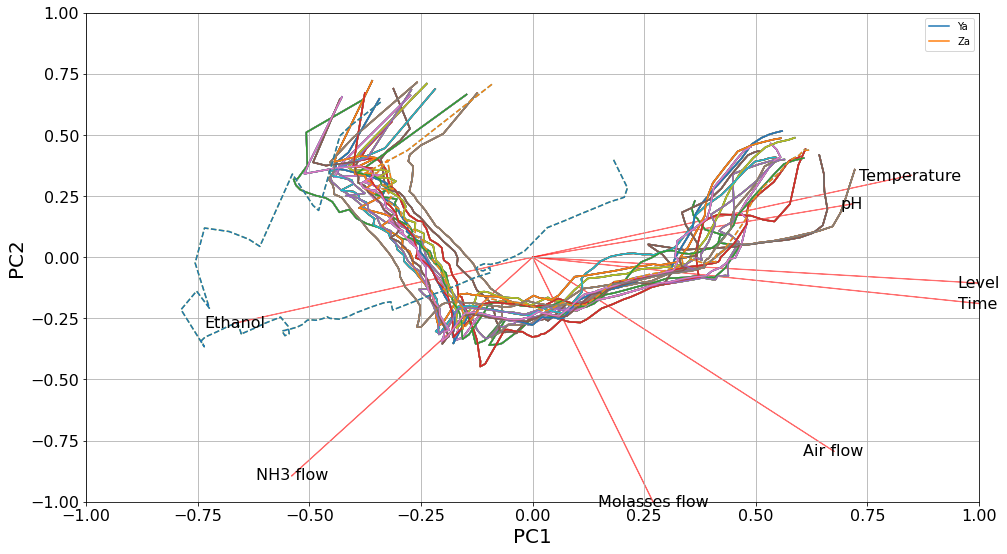

In [77]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(scores_pivot,scores_pivot_to,loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

3.  Do the batches show behaviour similar to that of the reference ones or there are outliers indicating potential problems?

**Answer: Batch Za shows similar trend as the previous batches.
Ya we can observe that the quantity of NH3 flow; Ethanol is high and that of Temperature, PH, Molasses flow, Air flow, Level is low as per the score-loadings plot**

